# CLASSIFICATION MODEL OF CUSTOMER CHURN PREDICTION 

# Introduction

Customer churn is  when customers or subscribers discontinue doing business with a firm or service.
To be simple, it is when customers stops being your customer.

Telco churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7,043 California customers in the third quarter. Which customers have left, stayed, or signed up for their service shows?

Goal:To apply machine learning models to predict churn on an individual customer basis and take counter measures such as discounts, special offers or other gratifications to keep their customers.Moreover,the ultimate goal is to expand its coverage area and retrieve more customers loyalty.

# Installation

In [47]:
!pip install -U scikit-learn, scikitplot

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\LENOVO\\anaconda3\\Lib\\site-packages\\~klearn\\cluster\\_dbscan_inner.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [1]:
!pip install --upgrade scipy

     ---------------------------------------- 42.5/42.5 MB 1.8 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.1
    Uninstalling scipy-1.9.1:
      Successfully uninstalled scipy-1.9.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.6.3 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.


In [2]:
!pip install -U imbalanced-learn

     ------------------------------------ 226.0/226.0 kB 551.8 kB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.2 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.6.3 requires scipy<1.10,>=1.4.1, but you have scipy 1.10.1 which is incompatible.


In [3]:
!pip install xgboost

# Importation

In [1]:
# Data handling
import pandas as pd
import numpy as np
# Vizualisation (Matplotlib, Plotly, Seaborn, etc. )
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (pandas-profiling, etc. )

# Statistics
from scipy import stats

# Feature Processing (Scikit-learn processing, etc. )
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

# balance data
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Machine Learning (Scikit-learn Estimators, Catboost, LightGBM, etc. )
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Hyperparameters Fine-tuning (Scikit-learn hp search, cross-validation, etc. )
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Evaluations
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, RocCurveDisplay, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from statistics import stdev
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Other packages
import os, pickle

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
data = pd.read_csv('Telco-Customer-Churn.csv')

# Exploratory Data Analysis

# Hypothesis

H0: The sample has a Gaussian distribution in the numerical feautures.

H1: The sample does not have a Gaussian distribution in the numerical feautures.

# Questions

1. Does longer tenure increase churn?
2. Is there any pattern in Customer Churn based on gender?
3. Which type of contract keeps more customers?
4. What's the most profitable Internetservice type

# Issues with the data

1. Some of the columns are irrelevant.
2. some of the columns are not in their respective data types.
3. The data values in the column payments method needs is not good for readability.
4. The data has missing values

# Solutions

1. Drop irrelevant columns
2. Replace the correct data types in their respective columns
3. Rename the data values for better readability.


In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.shape

(7043, 21)

In [5]:
# summary of the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
data['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [8]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Check of outliers by applying the IQR method checking
numerical_features = ['tenure','MonthlyCharges','TotalCharges']
df = data[numerical_features]

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
IQR
((df < (Q1-1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any()


MonthlyCharges    False
TotalCharges      False
tenure            False
dtype: bool

The results above showed there are no outliers

1. Drop irrelevant columns

the customerID needs to be drop

In [11]:
data = data.drop(['customerID'], axis = 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


2. Replace the correct data types in their respective columns

In [12]:
data['TotalCharges'] = pd.to_numeric(data.TotalCharges, errors='coerce')
 

3. Rename the data values for better readability.

In [13]:
payment_column = {'Electronic check : E-Check', 'Mailed check : Mailed Check', 'Bank transfer (automatic) : Bank Tranfer',
       'Credit card (automatic) : Credit Card'}
data['PaymentMethod'].replace(payment_column, inplace = True)               

In [14]:
# check for missing values after converting TotalCharges to numeric
data.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Bivariate Analysis

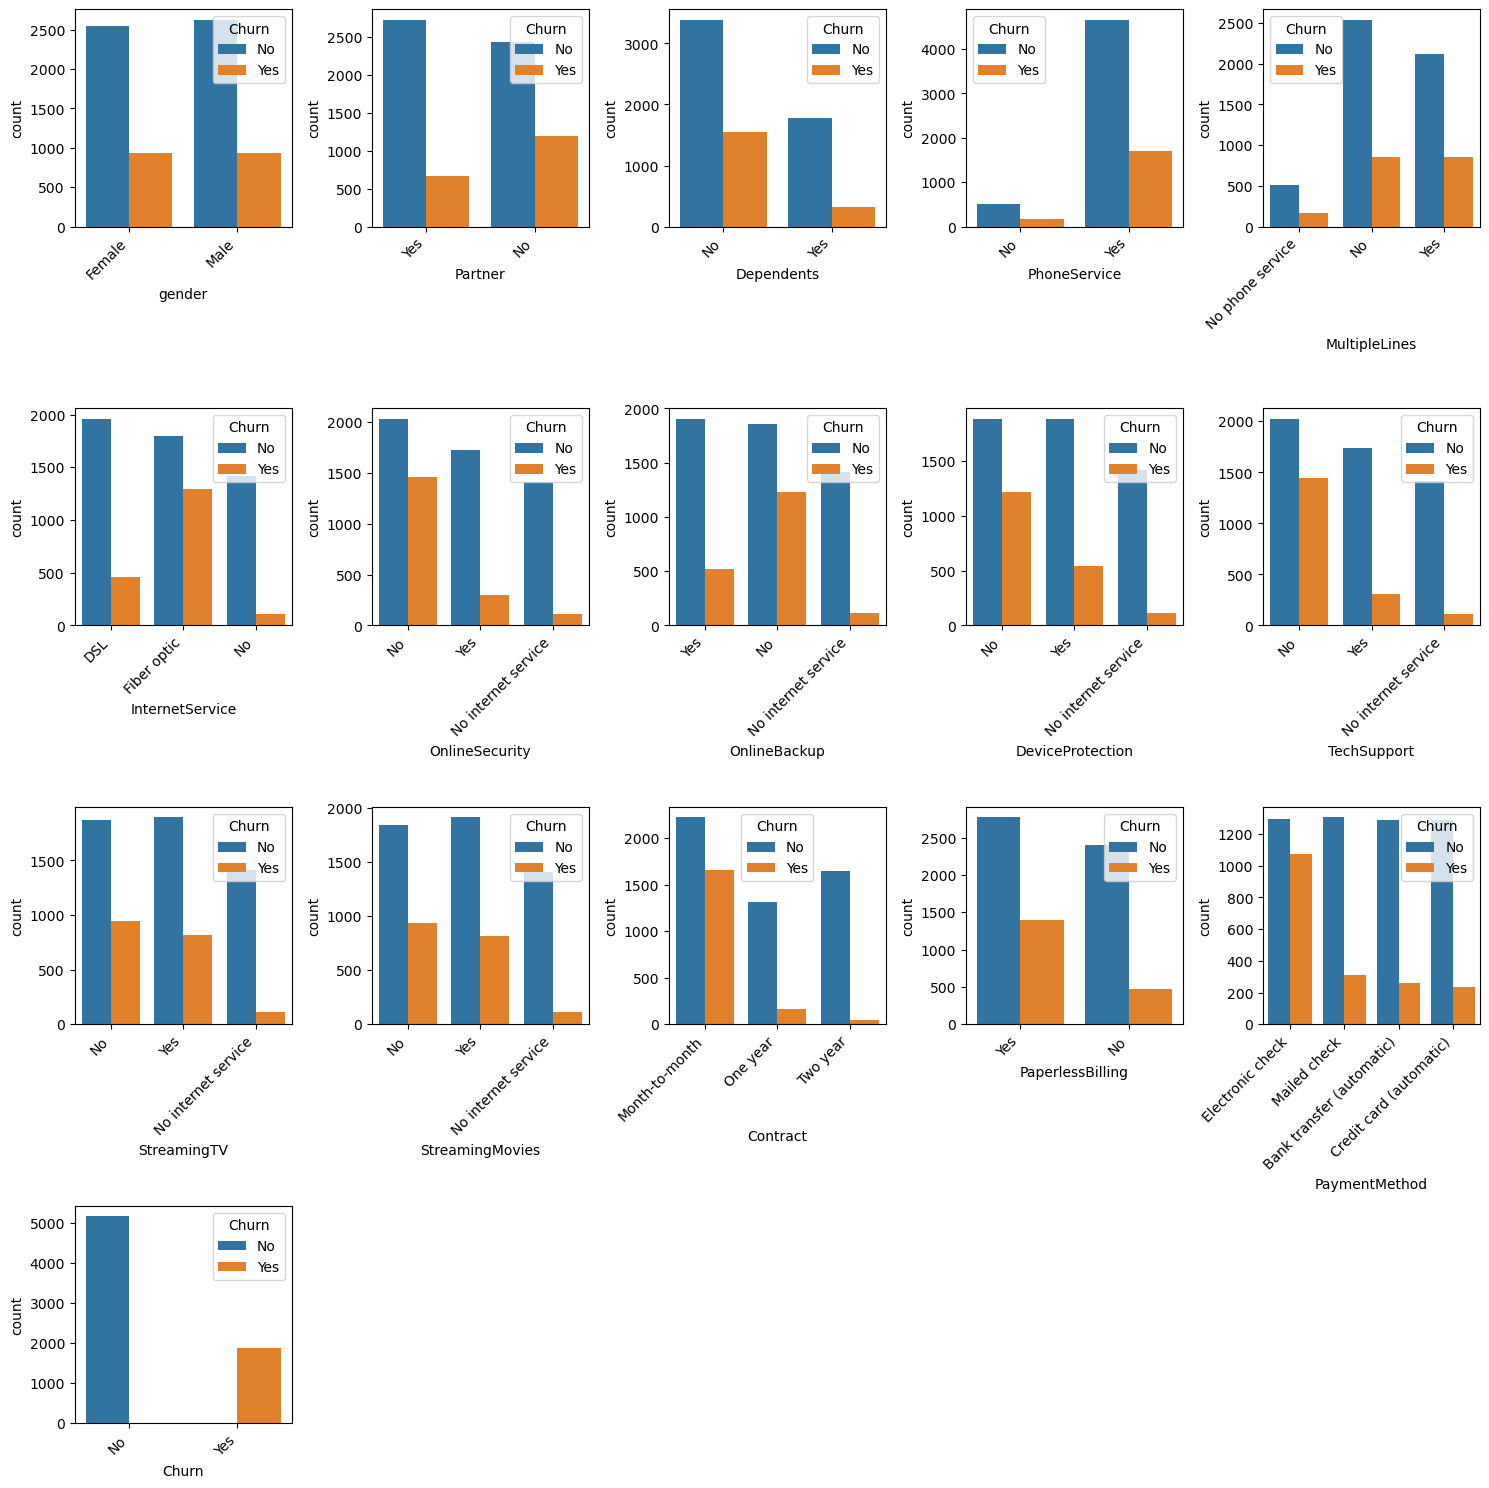

In [15]:

# Setup figure
cols = 5
rows = 4
fig = plt.figure(figsize= (15,15))

# Plotting
all_categorics = data.select_dtypes(include='object')
categoric_columns = all_categorics.columns[all_categorics.nunique()<5]
for i, col in enumerate(categoric_columns):
    ax=fig.add_subplot(rows, cols, i+1)
    sns.countplot(x=data[col], hue='Churn', data=data, ax=ax)    
    plt.xticks(rotation=45, ha='right')
fig.tight_layout()  
plt.show()
     


Observations:

 Gender is not affecting the churn.

 Customers who are more likely to churn:
1. who doesn't have partner
2. who doesn't have dependants
3. who has phone service
4. who use fiber optic as internet service
5. who didn't subscibe to any extra services (Online Backup, Online Security, etc)
6. who has contract month-to-month basis
7. who chose Paperless Billing
8. who use Electronic check

# Multivariate Analysis

<AxesSubplot:xlabel='tenure', ylabel='Count'>

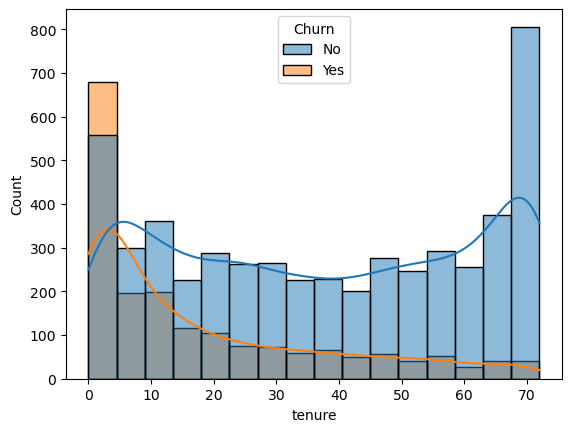

In [16]:
sns.histplot(data=data,
            x='tenure',
            hue='Churn', alpha=0.5, kde=True)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

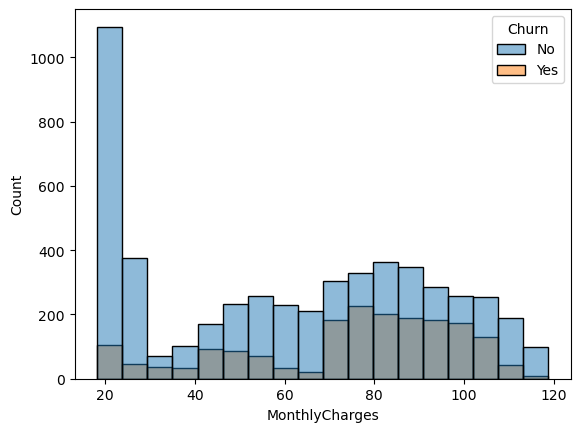

In [17]:
sns.histplot(data=data,
            x='MonthlyCharges',
            hue='Churn', alpha=0.5)

<AxesSubplot:>

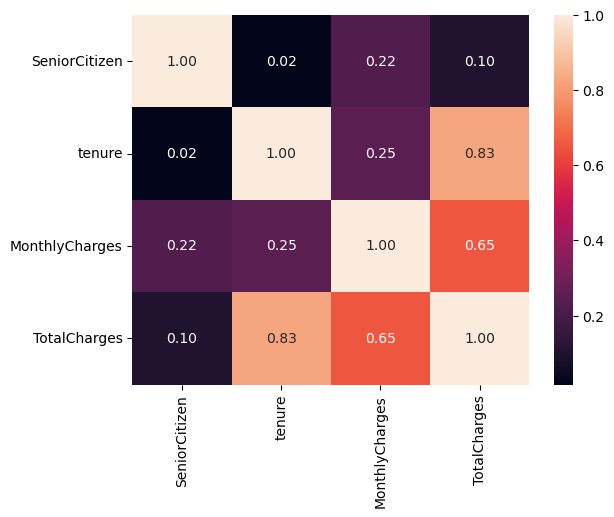

In [18]:
# correlation heatmap df
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Tenure is highly correlated to TotalCharges but not to MonthlyCharges. 

However MonthlyCharges and TotalCharges are somehow correlated to each other but the correlation value is less than 0.8.

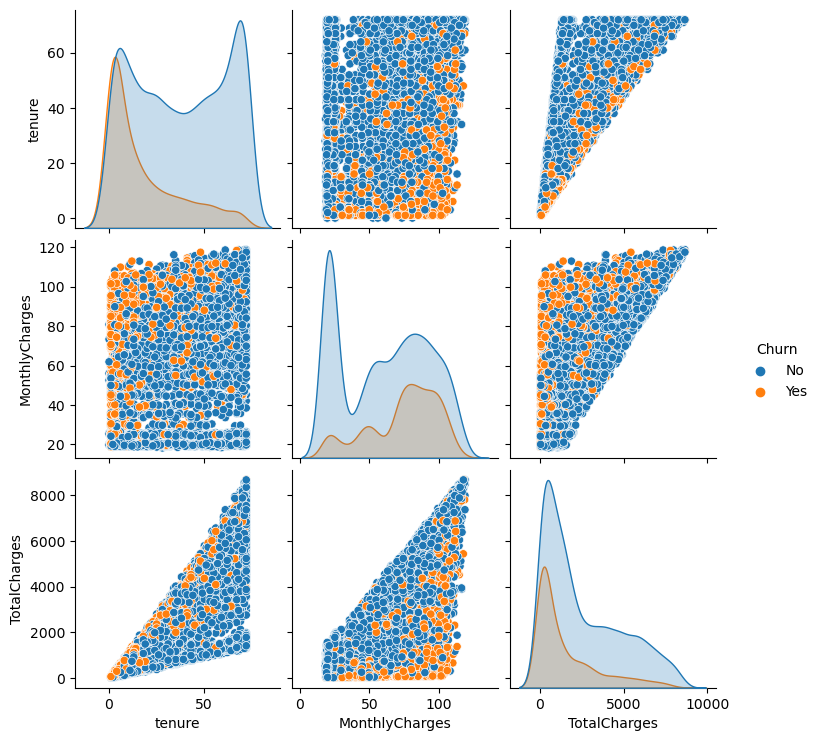

In [19]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges','TotalCharges'], hue="Churn")

Observations:

Customer that has shorter time subscribe the service (smaller tenure) most likely to churn.

Customer with lower MonthlyCharges is most likely to stay, and the higher Monthly Charges is most likely to churn.
 
Interestingly, customers with lower TotalCharges is most likely to churn.

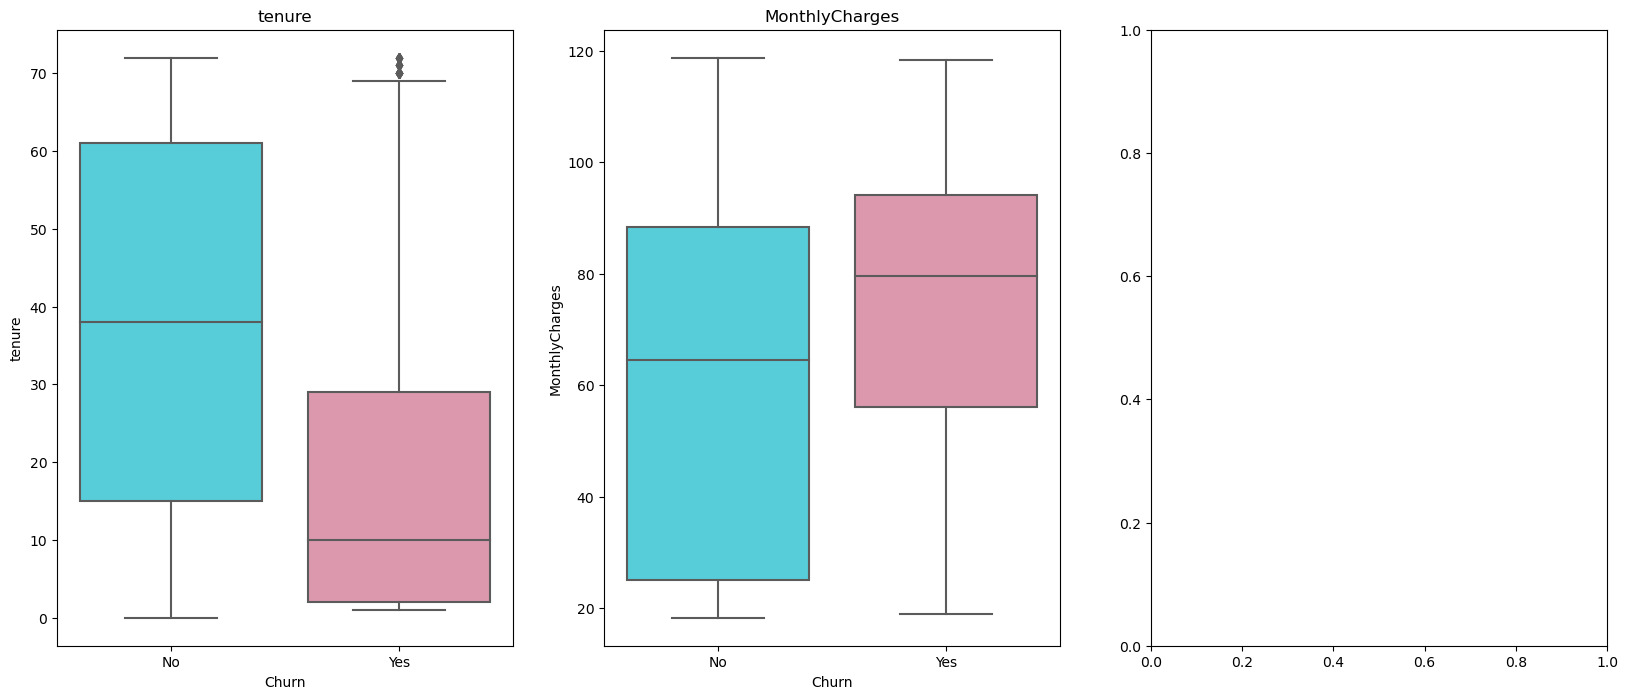

In [20]:
string_fields = [type(fld) is str for fld in df.iloc[0, :]]
all_features = [x for x in df.columns if x != 'Churn']
categorical_features = [x[1] for x in zip(string_fields, all_features) if x[0] is True ]
continues_features = [x for x in all_features if x not in categorical_features]
color = ('#40DFEF', '#E78EA9')
fig, ax = plt.subplots(1, 3, figsize=(20,8))
for i, p in enumerate(continues_features) :
        sns.boxplot(data=data, x='Churn', y=p, ax=ax[i], palette= color)
        ax[i].set_title(p)


Churning customers have much lower tenure  median  compared to a median of non-churners

Churning customers have higher monthly median charges and much lower interquartile range compared to that of non-churners



# Hypothesis validation

# Statistical Normality Tests

Normality tests are used to determine if a dataset is normally distributed about the mean value. it is assumed that during any measurement values will follow a normal distribution with an equal number of measurements above and below the mean value.

on the other hand, Gaussian distribution is a continuous probability distribution with symmetrical sides around its center. Its mean, median and mode are equal.

Popular normality tests - D’Agostino’s K^2, Shapiro-Wilk, Anderson-Darling .

There are three numerical features in this dataset - MonthlyCharges , Tenure, and TotalCharges.

# D’Agostino’s K^2 Test

# MonthlyCharges

In [21]:
stat, p = stats.normaltest(data['MonthlyCharges'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
    
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=11419.52879, p=0.000
Sample does not look Gaussian (reject H0)


# Tenure

In [22]:
stat, p = stats.normaltest(data['tenure'])

print('Statistics=%.5f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=76258.50517, p=0.000
Sample does not look Gaussian (reject H0)


# Anderson-Darling

# TotalCharges

In [23]:
result = stats.anderson(data['TotalCharges'])

print('Statistic: %.3f' % result.statistic)

p = 0

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data looks normal (fail to reject H0)')
    else:
        print(f'Significance level {sl:.2f} % : critical value {cv:.3f}, data does not look normal (reject H0)')

Statistic: nan
Significance level 15.00 % : critical value 0.576, data does not look normal (reject H0)
Significance level 10.00 % : critical value 0.656, data does not look normal (reject H0)
Significance level 5.00 % : critical value 0.787, data does not look normal (reject H0)
Significance level 2.50 % : critical value 0.917, data does not look normal (reject H0)
Significance level 1.00 % : critical value 1.091, data does not look normal (reject H0)


p-value is 0.00(<0.05) meaning the sample does not have Gaussian distribution in the numerical feautures.

## Anwering Questions

## 1. Does longer tenure increase churn?
customers with longer tenure have less churn rate.

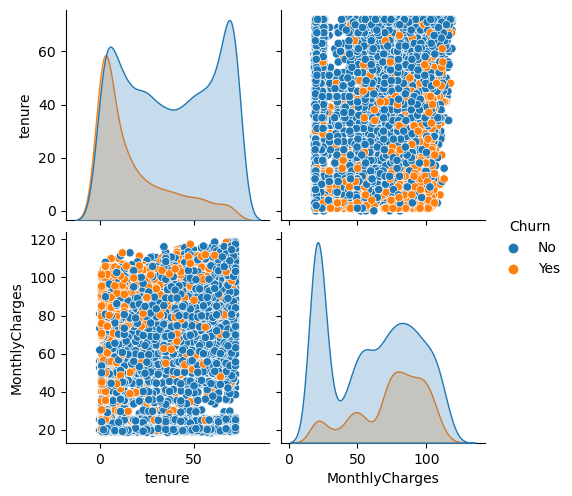

In [24]:
sns.pairplot(data,vars = ['tenure','MonthlyCharges'], hue="Churn")

## 2. Is there any pattern in Customer Churn based on gender?
The plot below shows that churn for both genders is very similar.

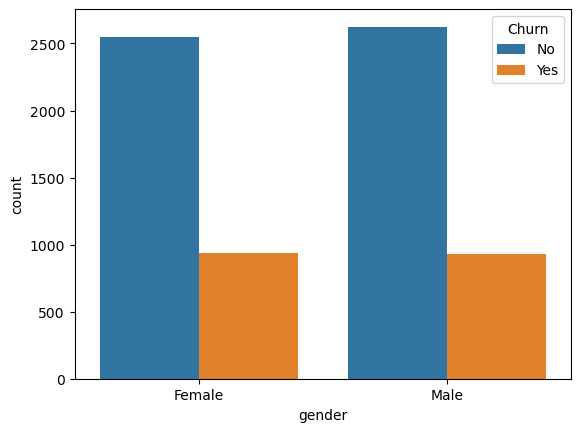

In [25]:
sns.countplot(data = data, 
              x = 'gender', 
              hue = 'Churn')
plt.show()

## 3. Which type of contract keeps more customers?
Churn rate for month-to-month contracts much higher that for other contract durations.

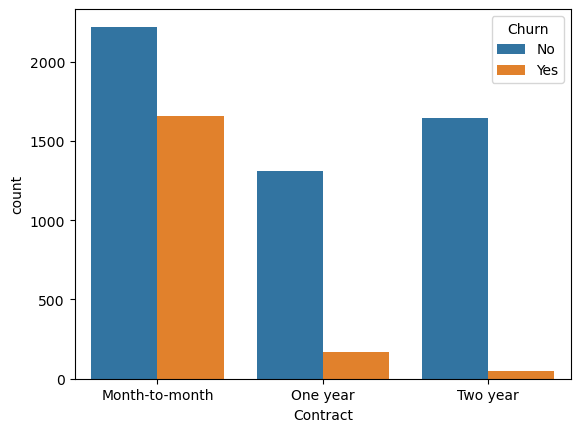

In [26]:
sns.countplot(data = data, 
              x = 'Contract', 
              hue = 'Churn')
plt.show()

## 4. What's the most profitable Internetservice type
FiberOptic InternetService keeps more customers

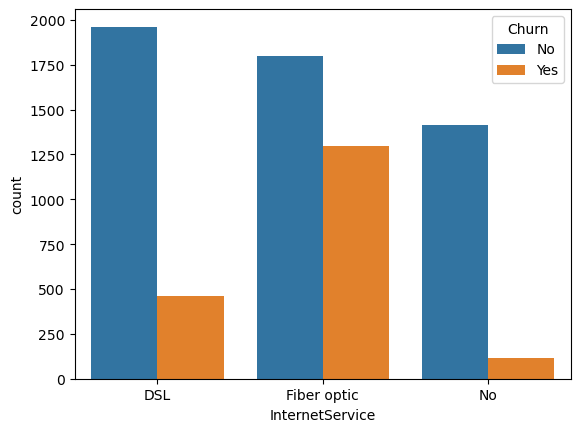

In [27]:
sns.countplot(data = data, 
              x = 'InternetService', 
              hue = 'Churn')
plt.show()

# Feature Processing & Engineering

# Drop Duplicates

In [28]:
data.duplicated().sum()


22

In [29]:
dup = data.loc[data.duplicated(),:]
dup.head(22)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
964,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1338,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
1491,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
1739,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
1932,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
2713,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2892,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
3301,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
3754,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No
4098,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.20,20.20,Yes


In [30]:
# Use pandas.DataFrame.drop_duplicates method
data.drop_duplicates(keep='first', inplace=True)

# Creating new features
Some columns are related to each other, so we'll add them together to avoid having unnecessary features

In [31]:
data["PhoneService"] = data.apply(lambda x: 
                                  "MultipleLines" 
                                  if x['MultipleLines'] == 'Yes' and x['PhoneService'] == 'Yes'
                                  else 
                                  "SingleLine" 
                                  if x['MultipleLines'] == 'No' and x['PhoneService'] == 'Yes'
                                  else 
                                  "None", 
                                  axis=1
                                  )
data['PhoneService'].unique()

array(['None', 'SingleLine', 'MultipleLines'], dtype=object)

In [32]:
data["StreamingService"] = data.apply(lambda x: 
                                  "FullService" 
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'Yes'
                                  else 
                                  "TV" 
                                  if x['StreamingTV'] == 'Yes' and x['StreamingMovies'] == 'No'
                                  else 
                                  "Movies" 
                                  if x['StreamingTV'] == 'No' and x['StreamingMovies'] == 'Yes'
                                  else 
                                  "None", 
                                  axis=1
                                  )
data["StreamingService"].unique()

array(['None', 'FullService', 'TV', 'Movies'], dtype=object)

In [33]:
data["SecurityService"] = data.apply(lambda x: 
                                  "FullSecurity" 
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'Yes'
                                  else 
                                  "OnlineSecurity" 
                                  if x['OnlineSecurity'] == 'Yes' and x['DeviceProtection'] == 'No'
                                  else 
                                  "DeviceProtection" 
                                  if x['OnlineSecurity'] == 'No' and x['DeviceProtection'] == 'Yes'
                                  else
                                  "None", 
                                  axis=1
                                  )
data["SecurityService"].unique()

array(['None', 'FullSecurity', 'OnlineSecurity', 'DeviceProtection'],
      dtype=object)

In [34]:
#drop the original features
drop_features = ['MultipleLines', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity', 'DeviceProtection']
data.drop(drop_features, axis=1, inplace=True)

# Dataset Splitting

# Impute Missing Values

In [35]:
# Drop the missing rows
data = data.dropna(subset = ['TotalCharges'])

In [36]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
OnlineBackup        0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
StreamingService    0
SecurityService     0
dtype: int64

In [37]:
le = LabelEncoder()
df=data
df[['Churn']] = df[['Churn']].apply(le.fit_transform) # Applying LabelEncoder to 'Churn' column

X = df.drop('Churn', axis=1)
y = df['Churn']

# Data Imbalance Check

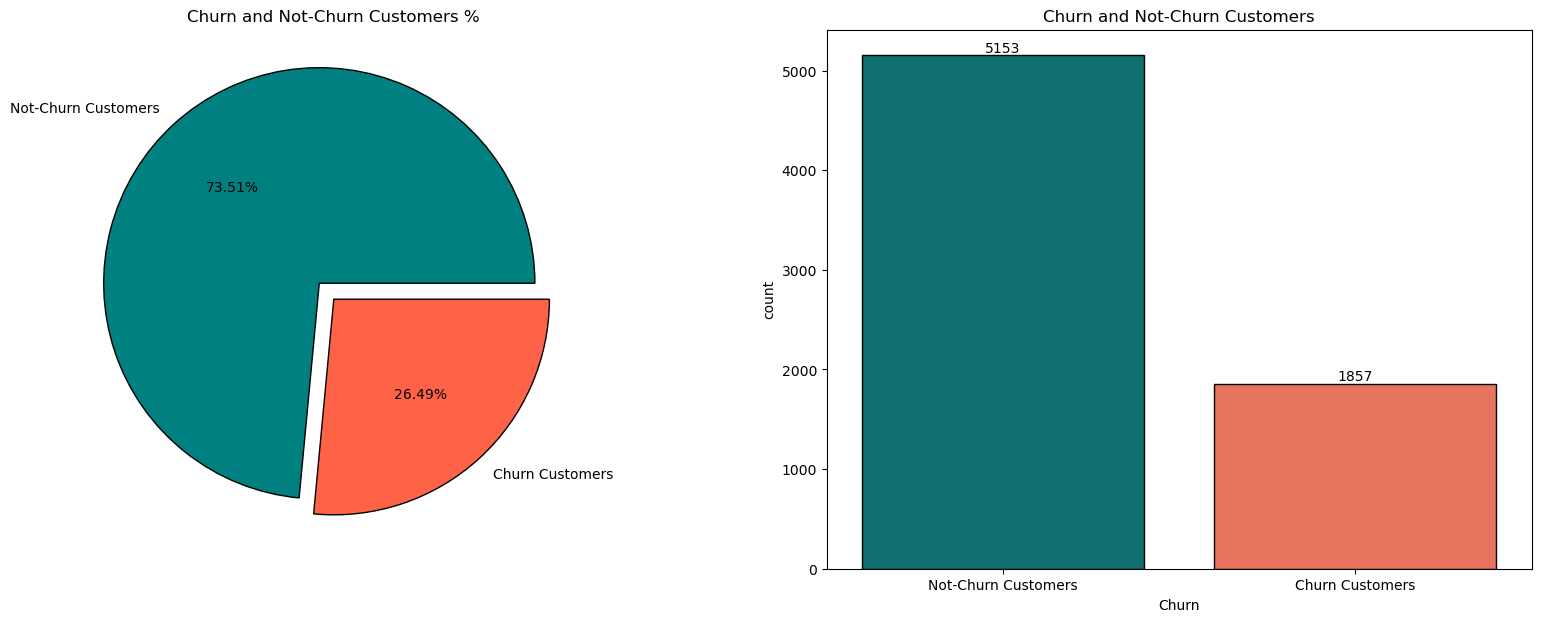

In [38]:
#Defining colors for the plots
palette = ['#008080','#FF6347', '#E50000', '#D2691E']
palette2 = ['#FF6347', '#008080', '#E50000', '#D2691E']

l1 = list(data['Churn'].value_counts())
pie_values = [l1[0] / sum(l1) * 100, l1[1] / sum(l1) * 100]

fig = plt.subplots(nrows = 1,ncols = 2,figsize = (20,7))

plt.subplot(1,2,1)
plt.pie(pie_values,labels = ['Not-Churn Customers','Churn Customers'], 
        autopct = '%1.2f%%',
        explode = (0.1,0),
        colors = palette,
        wedgeprops = {'edgecolor': 'black','linewidth': 1, 'antialiased' : True})
plt.title('Churn and Not-Churn Customers %');

plt.subplot(1,2,2)
ax = sns.countplot(data = data, 
                   x='Churn',
                   palette = palette, 
                   edgecolor = 'black')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_xticklabels(['Not-Churn Customers','Churn Customers'])
    
plt.title('Churn and Not-Churn Customers')
plt.show()


Dataset is imbalanced with almost 1:4 ratio. but it's still significant.

This means that a blind guess (on "Not-Churn") would give us accuracy of 73,51%

Therefore, we can't use Accuracy Score to choose our model

what to do to solve this issue:

1. We could use stratified splitting during train-test split (split the dataset in a way that preserves the same proportions of examples in each class.)
2. We could be extra careful when dealing with outliers (we can delete meaningull information).
3. Resampling Techniques — Oversample minority class or Undersample majority class.

In [39]:
#Oversampling the minority class (the churn customers)
ros = RandomOverSampler(random_state=0)
X_new,y_new= ros.fit_resample(X, y)

print("After Random Over Sampling Of Minor Class Total Samples are :", len(y_new))
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

After Random Over Sampling Of Minor Class Total Samples are : 10306
Original dataset shape Counter({0: 5153, 1: 1857})
Resampled dataset shape Counter({0: 5153, 1: 5153})


Now our data is balanced

# Dataset Splitting

we used stratify for features imbalance

In [40]:
# X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size = 0.2, random_state = 42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

In [41]:
X_train.shape, X_test.shape , y_train.shape, y_test.shape

((5608, 16), (1402, 16), (5608,), (1402,))

# Features Encoding

In [42]:
# Create both numerical and categorical columns
columns = list(df.columns)

categoric_columns = []
numeric_columns = []

for i in columns:
    if len(df[i].unique()) > 6:
        numeric_columns.append(i)
    else:
        categoric_columns.append(i)

categoric_columns.remove('Churn') # Excluding 'Churn'

Let's use OneHotEncoder to encode the categorical columns except churn for which we already used labelEncoder

use drop='first' to handle multicollinearity that we mentioned earlier

we want our output to be a DataFrame instead of setting it manually (sklearn version 1.2.1)

In [43]:
# calling our encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first")
# setting output to DataFrame
encoder.set_output(transform="pandas")
# encoding our data
X_catEncoded_train = encoder.fit_transform(X_train[categoric_columns])

Encoding our test data with the same steps

In [44]:
# encoding our test data
X_catEncoded_test = encoder.transform(X_test[categoric_columns])

# Features Scaling


In [45]:
Scaler = StandardScaler().fit(X_train[numeric_columns]).set_output(transform="pandas")

X_numScaled_train = Scaler.transform(X_train[numeric_columns])
X_numScaled_test = Scaler.transform(X_test[numeric_columns])

joining cat with num

In [46]:
X_train = pd.concat([X_numScaled_train, X_catEncoded_train], axis=1)
X_test = pd.concat([X_numScaled_test, X_catEncoded_test], axis=1)

In [47]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_None,PhoneService_SingleLine,InternetService_Fiber optic,...,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,StreamingService_Movies,StreamingService_None,StreamingService_TV,SecurityService_FullSecurity,SecurityService_None,SecurityService_OnlineSecurity
4275,-1.282296,-1.300406,-0.998451,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1899,-0.629952,0.866789,-0.297371,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
401,-0.874581,-1.489869,-0.904787,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1627,-0.874581,0.366539,-0.626953,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2770,-0.629952,0.919972,-0.340282,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,-1.119210,1.303885,-0.770355,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5064,-1.241524,-0.813452,-0.975737,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2973,1.204766,1.172590,1.766869,0.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1262,-0.833809,-0.452807,-0.739333,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Machine Learning Modeling

1. Logistic Regression
2. RandomForest Classifier
3. XGBoost Classifier
4. K Nearest Neighbors
5. Support Vector Machines 
6. DecisionTreeClassifier


# 1.  Logistic Regression

# Create the Model

In [48]:
model= LogisticRegression()

# Train the Model

In [49]:
model=model.fit(X_train, y_train)


#  Predict on the test dataset

In [50]:
pred = model.predict(X_test)
prob = model.predict_proba(X_test)[:,1]


# Model Evaluation

In [51]:
r_lgt= recall_score(y_test, pred)
print("recall_score : ", r_lgt)

p_lgt= precision_score(y_test, pred)
print("precision_score :",p_lgt)

f1_lgt= f1_score(y_test, pred)
print("f1_score :", f1_lgt)

f2_lgt = fbeta_score(y_test, pred, beta=2, average='binary')
print("f2_score :", f2_lgt)

A_lgt= accuracy_score(pred, y_test)
print("accuracy_score :",A_lgt)

acu_lgt = roc_auc_score(pred, y_test)
print("ROC_AUC Score:",acu_lgt)
     

recall_score :  0.5471698113207547
precision_score : 0.632398753894081
f1_score : 0.5867052023121387
f2_score : 0.5623268698060941
accuracy_score : 0.7960057061340942
ROC_AUC Score: 0.7384935490099452


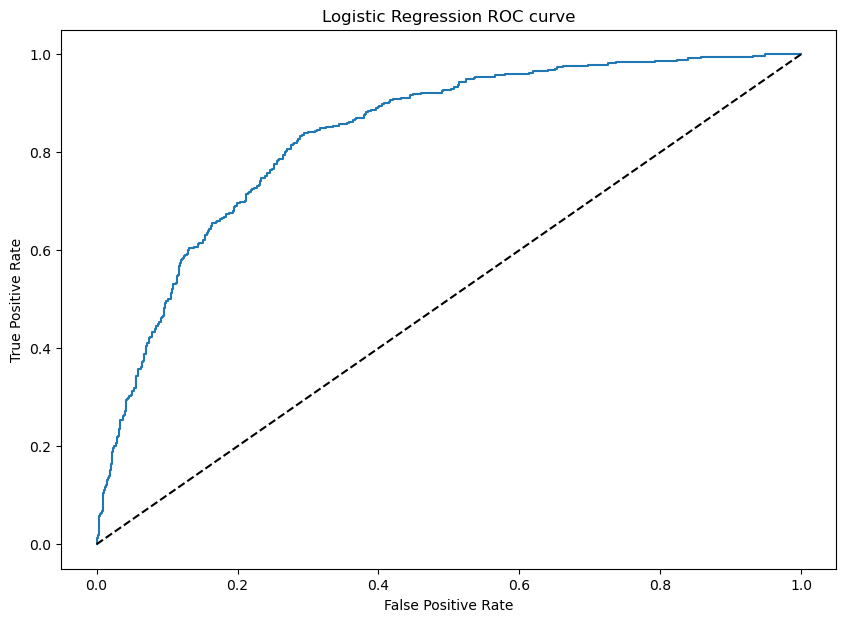

In [52]:
# plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('Logistic Regression ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 2. RandomForest Classifier

# Create the Model

In [53]:
RF_model= RandomForestClassifier()


# Train the Model

In [54]:
RF_model= RF_model.fit(X_train, y_train)

# Predict on the test dataset

In [55]:
rf_pred= RF_model.predict(X_test)
rf_proba= RF_model.predict_proba(X_test)[:,1]

# Model Evaluation

In [56]:
r_rf=  recall_score(y_test, rf_pred)
print("recall_score : ", r_rf)

p_rf= precision_score(y_test, rf_pred)
print("precision_score :",p_rf)

f1_rf= f1_score(y_test, rf_pred)
print("f1_score :", f1_rf)


f2_rf = fbeta_score(y_test, rf_pred, beta=2, average='binary')
print("f2_score :", f2_rf)

A_rf= accuracy_score(y_test, rf_pred)
print("accuracy_score :",A_rf)

acu_rf = roc_auc_score(rf_pred, y_test)
print("ROC_AUC Score:",acu_rf)
     

recall_score :  0.49056603773584906
precision_score : 0.5796178343949044
f1_score : 0.5313868613138686
f2_score : 0.5061179087875417
accuracy_score : 0.7710413694721826
ROC_AUC Score: 0.7029522995503934


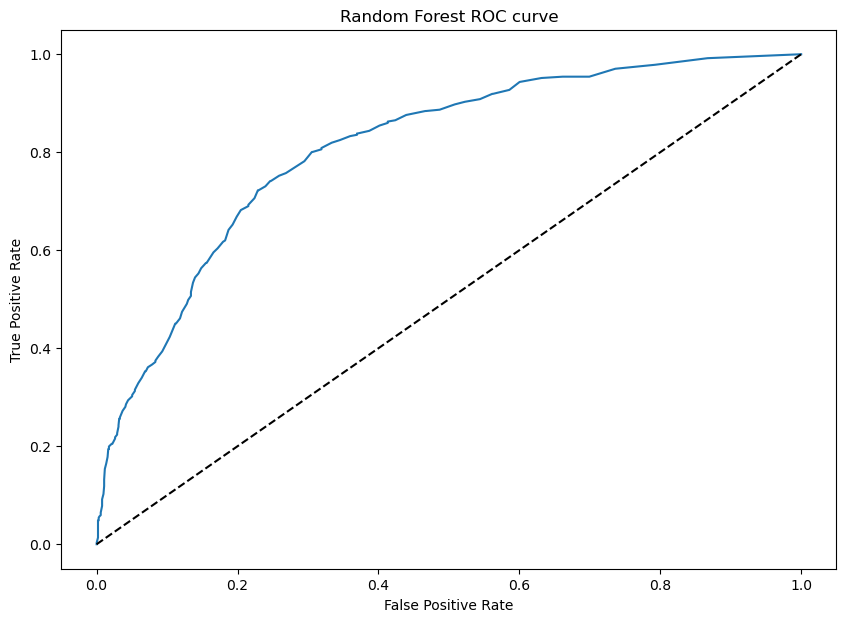

In [57]:
# plot the model evaluation
fig, ax = plt.subplots(figsize=(10,7))
fpr, tpr, _ = roc_curve(y_test, rf_proba)

plt.title('Random Forest ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 3. XGBoost Classifier

# Create the Model

In [58]:
XG_model= XGBClassifier()

# Train the Model

In [59]:
XG_model= XG_model.fit(X_train, y_train)

# Predict on the test dataset

In [60]:
XG_pred = XG_model.predict(X_test)
XG_prob = XG_model.predict_proba(X_test)[:,1]

# Model Evaluation

In [61]:
r_XG= recall_score(y_test, XG_pred)
print("recall_score : ", r_XG)

p_XG= precision_score(y_test, XG_pred)
print("precision_score :",p_XG)

f1_XG= f1_score(y_test, XG_pred)
print("f1_score :", f1_XG)

f2_XG = fbeta_score(y_test, XG_pred, beta=2, average='binary')
print("f2_score :", f2_XG)


A_XG= accuracy_score( y_test, XG_pred)
print("accuracy_score :",A_XG)

acu_XG = roc_auc_score(XG_pred, y_test)
print("ROC_AUC Score:",acu_XG)
     

recall_score :  0.477088948787062
precision_score : 0.5939597315436241
f1_score : 0.5291479820627802
f2_score : 0.4966329966329966
accuracy_score : 0.775320970042796
ROC_AUC Score: 0.7091175469312324


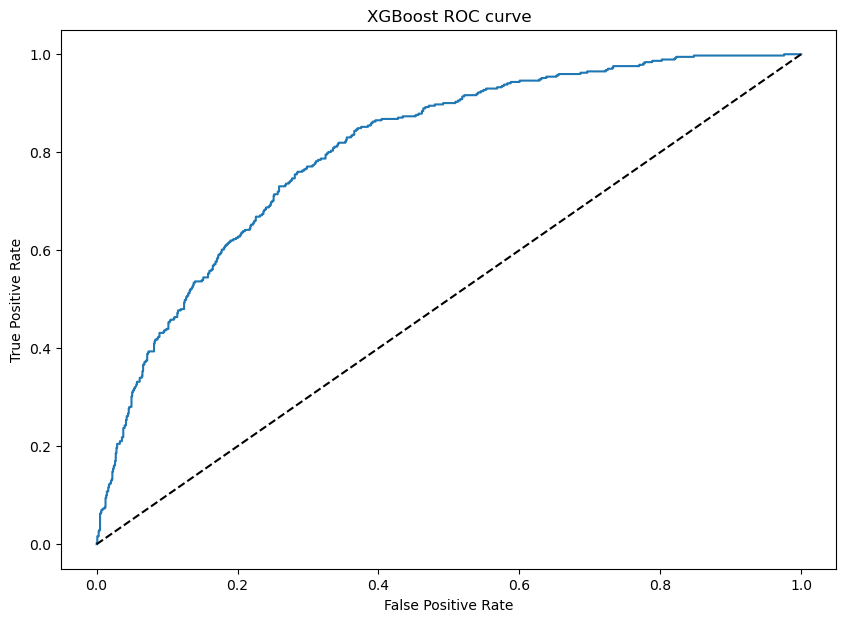

In [62]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, XG_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('XGBoost ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 4. K Nearest Neighbors


# Create the Model

In [63]:
KNN_model = KNeighborsClassifier()


# Train the Model

In [64]:
KNN_model = KNN_model.fit(X_train, y_train)

# Predict on the test dataset

In [65]:
KNN_pred = KNN_model.predict(X_test)
KNN_prob = KNN_model.predict_proba(X_test)[:,1]

# Model Evaluation

In [66]:
r_KNN= recall_score(y_test, KNN_pred)
print("recall_score : ", r_KNN)

p_KNN= precision_score(y_test, KNN_pred)
print("precision_score :",p_KNN)

f1_KNN= f1_score(y_test, KNN_pred)
print("f1_score :", f1_KNN)

f2_KNN = fbeta_score(y_test, KNN_pred, beta=2, average='binary')
print("f2_score :", f2_KNN)


A_KNN= accuracy_score( y_test, KNN_pred)
print("accuracy_score :", A_KNN)

acu_KNN = roc_auc_score(KNN_pred, y_test)
print("ROC_AUC Score:",acu_KNN)

recall_score :  0.5067385444743935
precision_score : 0.5310734463276836
f1_score : 0.5186206896551724
f2_score : 0.5114254624591947
accuracy_score : 0.7510699001426534
ROC_AUC Score: 0.6782275628584983


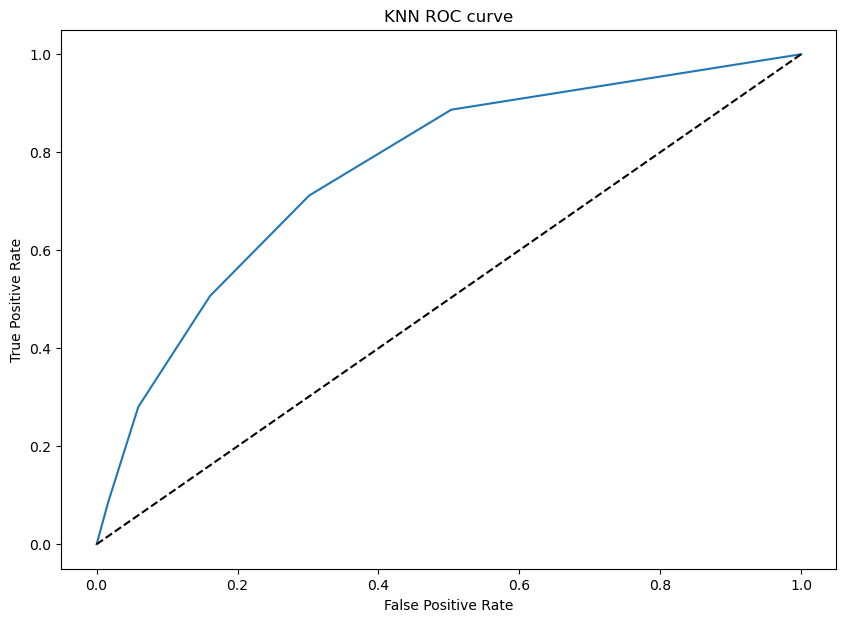

In [67]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, KNN_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('KNN ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

# 5. Support Vector Machines

# Create the Model

In [68]:
SVC_model = SVC(kernel='rbf',
                C=51,
                gamma=1,
                probability=True)

# Train the Model

In [69]:
SVC_model = SVC_model.fit(X_train, y_train)

# Predict on the test dataset

In [70]:
SVC_pred = SVC_model.predict(X_test)
SVC_prob = SVC_model.predict_proba(X_test)[:,1]

# Model Evaluation

In [71]:
r_SVC= recall_score(y_test, SVC_pred)
print("recall_score : ", r_SVC)

p_SVC= precision_score(y_test, SVC_pred)
print("precision_score :",p_SVC)

f1_SVC= f1_score(y_test, SVC_pred)
print("f1_score :", f1_SVC)

f2_SVC = fbeta_score(y_test, SVC_pred, beta=2, average='binary')
print("f2_score :", f2_SVC)


A_SVC= accuracy_score( y_test, SVC_pred)
print("accuracy_score :", A_SVC)

acu_SVC = roc_auc_score(SVC_pred, y_test)
print("ROC_AUC Score:",acu_SVC)

recall_score :  0.42048517520215634
precision_score : 0.5288135593220339
f1_score : 0.46846846846846846
f2_score : 0.43844856661045534
accuracy_score : 0.7475035663338089
ROC_AUC Score: 0.6672974752346394


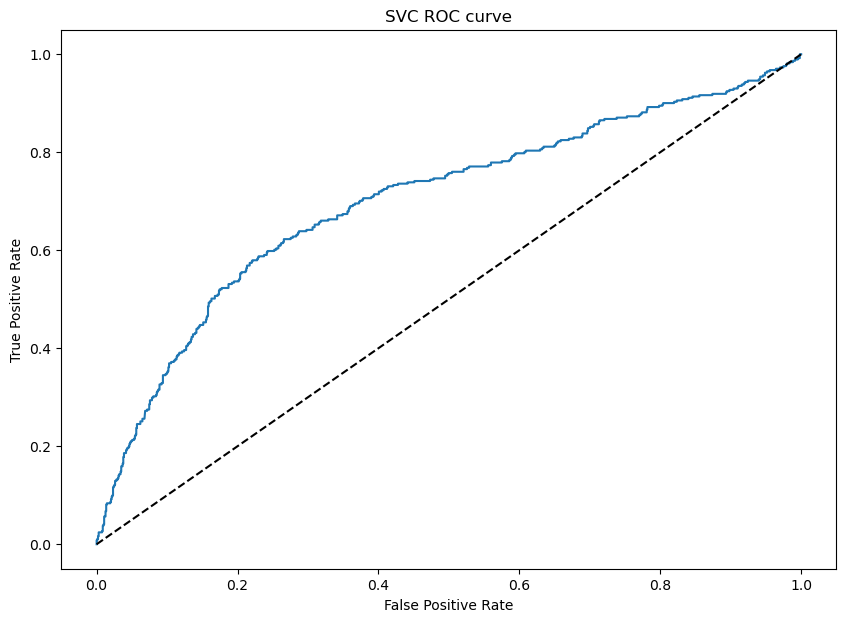

In [72]:
#  plot the model evaluation
fpr, tpr, _ = roc_curve(y_test, SVC_prob)
fig, ax = plt.subplots(figsize=(10,7))
plt.title('SVC ROC curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.plot((0,1), linestyle="--",color='black')
plt.show()

#  6. DecisionTreeClassifier

# Create the Model

In [73]:
dtmodel = DecisionTreeClassifier()

# Train the Model

In [74]:
dtmodel = dtmodel.fit(X_train, y_train)

# Predict on the test dataset

In [75]:
dt_pred = dtmodel.predict(X_test)
dt_prob = dtmodel.predict_proba(X_test)[:,1]

# Model Evaluation

In [76]:
r_dt= recall_score(y_test, dt_pred)
print("recall_score : ", r_dt)

p_dt= precision_score(y_test, dt_pred)
print("precision_score :",p_dt)

f1_dt= f1_score(y_test, dt_pred)
print("f1_score :", f1_dt)

f2_dt = fbeta_score(y_test, dt_pred, beta=2, average='binary')
print("f2_score :", f2_dt)


A_dt= accuracy_score( y_test, dt_pred)
print("accuracy_score :", A_dt)

acu_dt = roc_auc_score(dt_pred, y_test)
print("ROC_AUC Score:",acu_dt)

recall_score :  0.4555256064690027
precision_score : 0.4543010752688172
f1_score : 0.4549125168236877
f2_score : 0.45528017241379315
accuracy_score : 0.7111269614835949
ROC_AUC Score: 0.6290922852072242


# Models comparison


In [77]:
compare_models = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Accuracy':[A_lgt,A_rf,A_XG,A_KNN,A_SVC,A_dt],'Recall':[r_lgt,r_rf, r_XG,r_KNN,r_SVC,r_dt],'Precision':[p_lgt, p_rf, p_XG,p_KNN,p_SVC,p_dt], 'f1_score':[f1_lgt, f1_rf, f1_XG,f1_KNN,f1_SVC,f1_dt], 'f2_score':[f2_lgt,f2_rf,f2_XG,f2_KNN,f2_SVC,f2_dt],'ROC_AUC':[acu_lgt, acu_rf, acu_XG,acu_KNN,acu_SVC,acu_dt],'Description':['','','','','best model','']}
result=pd.DataFrame(data=data, index=compare_models)
result
     

,Accuracy,Recall,Precision,f1_score,f2_score,ROC_AUC,Description
Logistic Regression,0.796006,0.547170,0.632399,0.586705,0.562327,0.738494,
Randomforest,0.771041,0.490566,0.579618,0.531387,0.506118,0.702952,
XGBClassifier,0.775321,0.477089,0.593960,0.529148,0.496633,0.709118,
K Nearest Neighbors,0.751070,0.506739,0.531073,0.518621,0.511425,0.678228,
Support Vector Machines,0.747504,0.420485,0.528814,0.468468,0.438449,0.667297,best model
DecisionTreeClassifier,0.711127,0.455526,0.454301,0.454913,0.455280,0.629092,


After train split test the best model is Support Vector Machines. But that won't be the conclusion for the best model unless after cross validation.

# k-Fold cross validation 

# 1. Logistic Regression

The best perfoming model was Logistic Regression

In [78]:
kf_lgt = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(model, X_train, y_train, cv=kf_lgt, scoring='recall', error_score="raise")
lgt_cv_score = score.mean()
lgt_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', lgt_cv_score)
print('Cross Validation Recall standard deviation: ', lgt_cv_stdev)

Cross Validation Recall scores are: [0.58305085 0.56870229 0.50316456 0.54248366 0.52442997]
Average Cross Validation Recall score:  0.5443662644106835
Cross Validation Recall standard deviation:  0.032354752138241266


# 2. RandomForest Classifier


In [79]:
kf_RF = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(RF_model, X_train, y_train, cv=kf_RF, scoring='recall', error_score="raise")
RF_cv_score = score.mean()
RF_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', RF_cv_score)
print('Cross Validation Recall standard deviation: ', RF_cv_stdev)

Cross Validation Recall scores are: [0.5        0.51689189 0.53225806 0.47936508 0.47098976]
Average Cross Validation Recall score:  0.49990095937305
Cross Validation Recall standard deviation:  0.02546204824776066


# 3. XGBoost Classifier

In [80]:
kf_XG = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(XG_model, X_train, y_train, cv=kf_XG, scoring='recall', error_score="raise")
XG_cv_score = score.mean()
XG_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', XG_cv_score)
print('Cross Validation Recall standard deviation: ', XG_cv_stdev)

Cross Validation Recall scores are: [0.51351351 0.48253968 0.53082192 0.49315068 0.56357388]
Average Cross Validation Recall score:  0.5167199363908868
Cross Validation Recall standard deviation:  0.03212568568620817


# 4. K Nearest Neighbors

In [81]:
kf_KNN = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(KNN_model, X_train, y_train, cv=kf_KNN, scoring='recall', error_score="raise")
KNN_cv_score = score.mean()
KNN_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', KNN_cv_score)
print('Cross Validation Recall standard deviation: ', KNN_cv_stdev)

Cross Validation Recall scores are: [0.57859532 0.53767123 0.48666667 0.52559727 0.51986755]
Average Cross Validation Recall score:  0.5296796073125158
Cross Validation Recall standard deviation:  0.03324029115243212


# 5. Support Vector Machines

In [82]:
kf_SVC = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(SVC_model, X_train, y_train, cv=kf_SVC, scoring='recall', error_score="raise")
SVC_cv_score = score.mean()
SVC_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', SVC_cv_score)
print('Cross Validation Recall standard deviation: ', SVC_cv_stdev)

Cross Validation Recall scores are: [0.44051447 0.42474916 0.42807018 0.39393939 0.41836735]
Average Cross Validation Recall score:  0.4211281099299481
Cross Validation Recall standard deviation:  0.017204529420422263


# 6. DecisionTreeClassifier

In [83]:
kf_dt = KFold(n_splits = 5,shuffle=True)
score = cross_val_score(dtmodel, X_train, y_train, cv=kf_dt, scoring='recall', error_score="raise")
dt_cv_score = score.mean()
dt_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', dt_cv_score)
print('Cross Validation Recall standard deviation: ', dt_cv_stdev)

Cross Validation Recall scores are: [0.44295302 0.54491018 0.53198653 0.58122744 0.525     ]
Average Cross Validation Recall score:  0.5252154337169167
Cross Validation Recall standard deviation:  0.050838534550287716


In [84]:
com = ['Logistic Regression','Randomforest','XGBClassifier','K Nearest Neighbors','Support Vector Machines','DecisionTreeClassifier']

data={'Average Cross Validation score':[lgt_cv_score,RF_cv_score,XG_cv_score,KNN_cv_score,SVC_cv_score,dt_cv_score],
      'Cross Validation standard deviation':[lgt_cv_stdev,RF_cv_stdev,XG_cv_stdev,KNN_cv_stdev,SVC_cv_stdev,dt_cv_stdev],
      'Description':['','best model','','','','']
     }

result=pd.DataFrame(data=data, index=com)
result

,Average Cross Validation score,Cross Validation standard deviation,Description
Logistic Regression,0.544366,0.032355,
Randomforest,0.499901,0.025462,best model
XGBClassifier,0.516720,0.032126,
K Nearest Neighbors,0.529680,0.033240,
Support Vector Machines,0.421128,0.017205,
DecisionTreeClassifier,0.525215,0.050839,


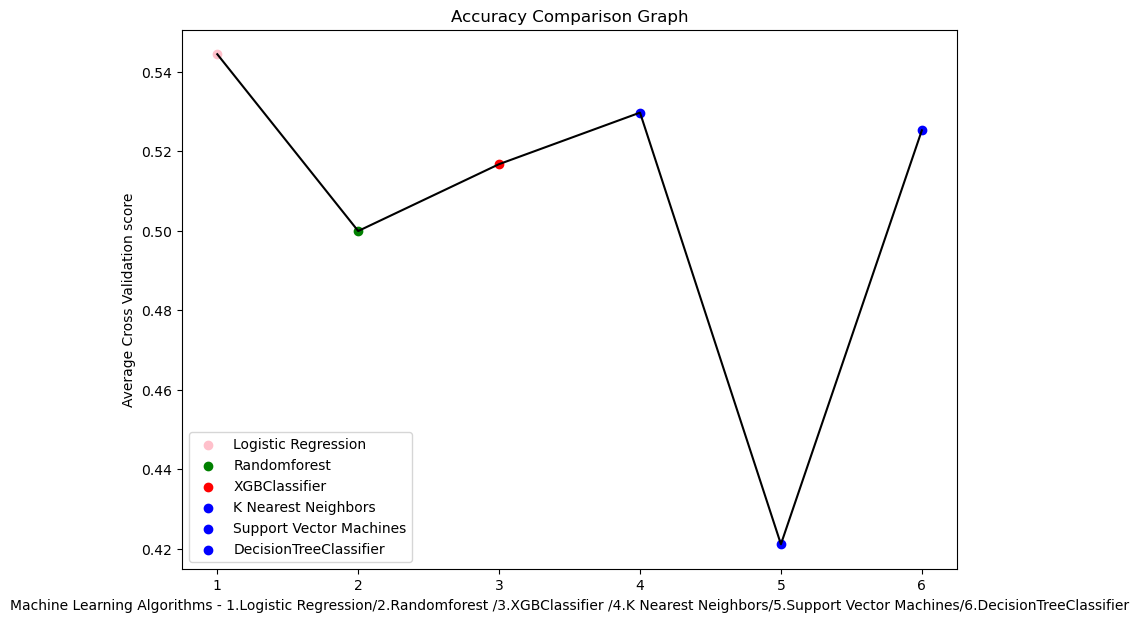

In [85]:
fig, ax = plt.subplots(figsize=(10,7))

plt.title("Accuracy Comparison Graph")

plt.ylabel("Average Cross Validation score")

plt.xlabel("Machine Learning Algorithms - 1.Logistic Regression/2.Randomforest /3.XGBClassifier /4.K Nearest Neighbors/5.Support Vector Machines/6.DecisionTreeClassifier")

x = [lgt_cv_score,RF_cv_score,XG_cv_score,KNN_cv_score,SVC_cv_score,dt_cv_score]

plt.plot([1,2,3,4,5,6],x, color = "black")

plt.scatter(1,lgt_cv_score, marker="o", color="pink", label="Logistic Regression")

plt.scatter(2,RF_cv_score, marker="o", color="green", label="Randomforest")

plt.scatter(3,XG_cv_score, marker="o", color="red", label="XGBClassifier")

plt.scatter(4,KNN_cv_score, marker="o", color = "blue",label = "K Nearest Neighbors")

plt.scatter(5,SVC_cv_score, marker="o", color = "blue",label = "Support Vector Machines")

plt.scatter(6,dt_cv_score, marker="o", color = "blue",label = "DecisionTreeClassifier")

plt.legend()

plt.show()

From the graph Randomforest is the best average cross validation score and also the best performing model.

# Hyperparameters tuning